## The great endash migration

June 2008: [This discussion](https://en.wikipedia.org/wiki/Wikipedia_talk:Manual_of_Style/Archive_100#En_dashes_in_page_names) blows up.

Run get_data.py, which is a script for parsing a list of redirects with endashes (from this quarry query) and gets data about when the page was first edited and by whom. It takes about a day to run on toollabs, so it is not run in this notebook.

In [ ]:
!python get_data.py

get_data.py produces tsv and pickle files for enwiki redirects.

In [1]:
!ls -lah

total 74M
drwxr-sr-x 3 tools.paws tools.paws 4.0K Mar  8 19:56 .
drwxr-sr-x 7 tools.paws tools.paws 4.0K Mar  8 18:09 ..
drwxr-sr-x 2 tools.paws tools.paws 4.0K Mar  8 19:56 .ipynb_checkpoints
-rw-r--r-- 1 tools.paws tools.paws  27M Mar  8 18:18 enwiki-redirects-endash-20170308.tsv
-rw-r--r-- 1 tools.paws tools.paws 8.4K Mar  8 21:44 enwiki-redirects-endash-errors.pickle
-rw-r--r-- 1 tools.paws tools.paws 7.6K Mar  8 21:44 enwiki-redirects-endash-errors.tsv
-rw-r--r-- 1 tools.paws tools.paws  11M Mar  8 21:44 enwiki-redirects-endash-processed.pickle
-rw-r--r-- 1 tools.paws tools.paws  10M Mar  8 21:44 enwiki-redirects-endash-processed.tsv
-rw-r--r-- 1 tools.paws tools.paws  27M Mar  8 18:09 enwiki-redirects-to-endash-20170308.tsv
-rw-r--r-- 1 tools.paws tools.paws 1.7K Mar  8 19:29 get_data.py
-rw-r--r-- 1 tools.paws tools.paws  25K Mar  8 19:55 process-visualize.ipynb
-rw-r--r-- 1 tools.paws tools.paws 171K Mar  8 19:56 redirects-scratch-notebook.ipynb


In [4]:
import pickle

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [110]:
pkl_file = open("enwiki-redirects-endash-processed.pickle", 'rb')
df = pickle.load(pkl_file)
len(df)


72550

In [111]:
def is_endash_rename(row):
    page_text = row.page_text
    page_title = row.page_title
    
    title_dash_loc = page_title.find("-")
    text_dash_loc = page_text.find("–")
    
    sep = text_dash_loc - title_dash_loc
    
    if title_dash_loc > 0 and (sep > 10 or sep < 14):
        return True
    else:
        return False

In [112]:
df['is_endash_rename'] = df.apply(is_endash_rename, axis=1)

df['is_endash_rename'].value_counts()

True     55705
False    16845
Name: is_endash_rename, dtype: int64

In [113]:
total_df = df[df.is_endash_rename == True].copy()

In [114]:
total_df['datetime'] = pd.to_datetime(total_df['timestamp'])


In [115]:
total_df = total_df.set_index('datetime')

In [116]:
gp = total_df.groupby([pd.TimeGrouper('1W', closed='left')])

/srv/paws/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


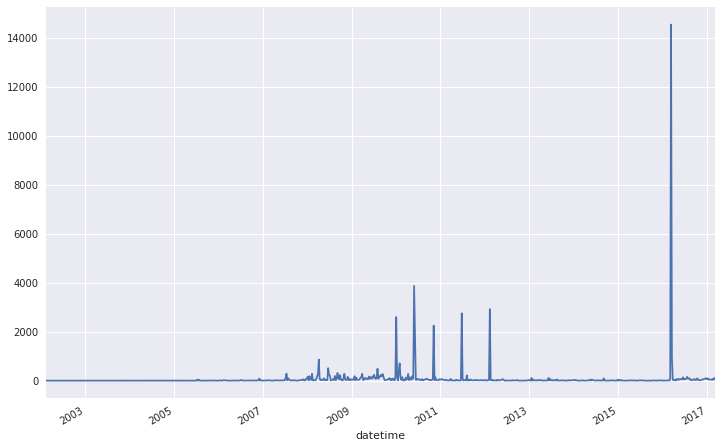

In [117]:
gp.revid.count().plot(figsize=[12,8])

### scratch

In [53]:
total_df = pd.DataFrame(columns=["revid", "timestamp", "user", "comment", "is_redirect", "page_title", "page_namespace", "page_text"])

for row in df.iterrows():

    
    page_text = row[1].page_text
    page_title = row[1].page_title
    
    title_dash_loc = page_title.find("-")
    text_dash_loc = page_text.find("–")
    
    sep = text_dash_loc - title_dash_loc
    
    if title_dash_loc > 0 and (sep > 10 or sep < 14):
        total_df = total_df.append(row[1])

KeyboardInterrupt: 